




# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#how_to">How to Read This Report</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prerequisites">Prerequisites</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#gp">General Properties</a></li>
<li><a href="#dc">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#rq1">Research Question 1:  Which genres are most popular from year to year?</a></li>
<li><a href="#rq2">Research Question 2: What properties are associated with high revenue movies?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='how_to'></a>
## How to Read this Report
The following convention is used in this report:
1. **<u>Bold Underline</u>** is used to identify organizations, courses..etc in the report.
2. **Bold** is used to identify packages names and dataset names.
3. ***Bold Italics*** is used to identify dataset column names.
4. *Italics* is used to identify values.
5. **<font color=red> Bold Red Color </font>** is used as a warning.
6. <font color=blue>Blue Color</font> is used as an emphasis.

<a id='intro'></a>
## Introduction
In this project, we will investigate the **<u>'TMDb Movie Data' dataset</u>**. This dataset is selected from <a href=https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf>Here</a> to fulfill the requirements of Project no. 2 in **<u>Egyptian MCIT / ITIDA FWD</u>** initiative course **<u>Data Analysis - Professional Nanodegree</u>** taken through **<u>Udacity</u>** online platform. The goal of this project is to <font color =blue>analyze</font>, <font color =blue>explore</font> and <font color =blue>visualize</font> a dataset in a way that would allow <font color =blue>concluding</font> results to help <font color =blue>answering</font> related questions.  
This dataset represent information about <font color =blue>10,000 movies</font> collected from a specific source. The goal is to answer the following questions:
1. **<font color =blue>Which genres are most popular from year to year?</font>**
2. **<font color =blue>What properties are associated with high revenue movies?</font>**

<a id='prerequisites'></a>
### Prerequisites
To run this project code successfully, the following packages must be installed and imported to the project.

1. **numpy**, **pandas**, **matplotlib** and **seaborn**:  
All of them are considered standard packages within this course and are assumed to be available already. In case any of those packages is not available, please install it (using the method appropriate to the available setup) first.
<br><br>
2. **IMDbPy**:  
- General to any dataset, missing inputs are not uncommon. The majority of these inputs in this dataset cannot be inferred using the standard **pandas** filling methods, because they are mainly characteristics of the movie being analyzed. As an example, how would one fill a missing 'genre' of a movie?
- As such it became of paramount importance to be able to get such data from another source. The source in this case, is the **<a href=https://www.imdb.com><u>IMDb website</u></a>**.
- There are many ways to scrape the website:
    - Screen scrape a webpage: requires massive works and is highly prone to errors.  
    - Use an API: most of the APIs found require registration for a key to be used. This imposes constraints for code sharing and reproducability.  
    - <font color=blue>Weapon of Choice:</font> Use **IMDbPy** python package and its <a href=https://imdbpy.readthedocs.io/en/latest/>Documentation</a>. This is a <font color = blue>GPL License</font> python package for retrieving and managing the data of the **<u>IMDb</u>** movies database. Use the Documentation reference to install it to be able to run this project.

In [1]:
#imports and magics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os.path

#display is used in the last code cells to apply Jupter display format of dataframes to multiple dataframes in one cell.
from IPython.display import display

#imdbpy package to get data from IMDB. Will be used to fill missing values.
try:
    from imdb import IMDb, IMDbError
except ImportError:
    if os.path.isfile(('missing_data_IMDb.csv')):
        print('IMDbPy is not installed, but the local file containing the missing data is available')
        print('The code can proceed, but will rely exclusively on the local file')
        print('Any attempt to override the code to run the cell(s) using IMDbPy will fail!!')
    else:
        print('Neither IMDbPy nor local file containing missing data is available')
        print('Please install IMDbPy and run the program again')
        exit() 

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


<a id='gp'></a>
### General Properties

Before loading the dataset, the <a href=https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf>data-set-options</a> list two very important constraints:<br>
1. There are some odd characters in the ***'cast'*** column.
2. Certain columns contain multiple values separated by *pipe (|)*.

As such, it is wise to consider the following:

1. Since there are odd characters, then the dataset will be read with an encoding of *'UTF-8'* to be able to read unicodes.
2. *Pipe (|)* when used as a separator may be confused with *meta-characters* of special use or *regular expressions (regex)*. This can be converted during loading the file, but this will not be done unless proven required for the code to execute successfully and smoothly.

In [2]:
# Loading and knowing data
df = pd.read_csv('tmdb-movies.csv', encoding='UTF-8')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In the above cells, the first 2 rows of the dataset, and info of columns data types were printed for investigating the dataset. The following can be concluded:
1. ***id*** is an identifier for records as probably would relate to the data source. <font color=blue>This is not needed and can be deleted.</font> 
2. ***imdb_id*** is an identifier that will help reaching the related **<u>IMDb</u>** movie page if required to collect missing data. However, it appears that there are *10* rows with blank ***imdb_id***. <font color=blue>These will need further investigation.</font>
3. ***cast***, ***director***, ***keywords***, ***generes***, ***production_companies*** all have varying number of null entries. <font color = blue>These are the data that will be collected from</font> **<font color = blue><u>IMDb</u></font>** using the ***<font color = blue>imdb_id</font>***.
4. ***homepage***, ***tagline***, ***overwiew*** have also null entries. However, these properties are not related to the questions under investigation, <font color=blue>and as such can be safely deleted.</font>
5. ***budget***, ***revenue*** are integers. <font color=blue>They need to be further assessed because a value of</font> *<font color = blue>0<\font>* <font color = blue>in an integer field can be treated as a</font>*<font color = blue>null</font>*.
6. ***budget_adj***, ***revenue_adj*** are floats. So the same rule apply as that of the above item for integers.
7. ***release_date*** is shown as a string, it can be converted to date. However, there is another column for ***release_year*** and is read as integer. Since all manipulations will be based on ***release_year***, ***release_date*** can be safely deleted.

So, let's have a look at those ***imdb_id*** *null* entries to evaluate what are the possible actions.

In [4]:
df[df['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


This is interesting\! <br>
All the *nulls* have ***revenues*** = *0*. Probably they won't help answering questions related to that.<br>
Let's have a look at the ***popularity*** of  the dataset entries and compare them with the ***popularity*** of those ***imdb_id*** *null* entries.

In [5]:
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

Even more interesting\!<br>
All the ***imdb_id*** *null* entries have ***popularity*** that is below the mean of popularity in the dataset. Probably, they won't help answer questions related to popularity as well.<br>
As such, one can safely conclude to <font color=blue>delete those entries from the dataset.</font>

Ok, so what else can we do to understand the data?

Are there any duplicates?

In [6]:
print('Duplicated rows: '+ str(df.duplicated(keep=False).sum()))
print('Duplicate values in each column:\n{}'.format(df.apply(lambda x: x.duplicated(keep=False)).sum()))

Duplicated rows: 2
Duplicate values in each column:
id                          2
imdb_id                    12
popularity                104
budget                  10552
revenue                  6246
original_title            572
cast                      200
homepage                 7998
director                 7649
tagline                  2909
keywords                 2193
overview                   23
runtime                 10811
genres                   9641
production_companies     4016
release_date             7481
vote_count              10220
vote_average            10861
release_year            10866
budget_adj               9235
revenue_adj              6038
dtype: int64


These duplicates shed some more light, considering that counts of duplicates take into account all the rows (unique row is not excluded from duplicate count):
1. There are two duplicate rows and two duplicate ***id***'s. If we delete the duplicate row, we will also have no further duplicates in the ***id***.
2. There are 12 duplicates in the ***imdb_id***. This will be investigated below, but it is most probably the *null* values identified above (total *10*) and the two duplicate rows identified in item 1.
3. There are *572* duplicates in the ***original_title***. This needs to be investigated.
4. Duplicates in other columns are logical to happen and will not be investigated further for cleaning.

In [7]:
df[df['imdb_id'].duplicated(keep=False)]['imdb_id']

548           NaN
997           NaN
1528          NaN
1750          NaN
2089    tt0411951
2090    tt0411951
2401          NaN
4797          NaN
4872          NaN
6071          NaN
7527          NaN
7809          NaN
Name: imdb_id, dtype: object

In [8]:
df[df['imdb_id']=='tt0411951']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df[df['original_title'].duplicated(keep=False)].sort_values(by=['original_title']).head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000e+00
5724,217316,tt2518788,0.364669,0,0,1,Michael Fassbender|Niki Lauda|Michael Schumach...,https://www.facebook.com/1thefilm,Paul Crowder,The True Story of the Drivers Who Risked Their...,...,Set in the golden era of Grand Prix Racing '1'...,112,Documentary,Exclusive Media Group|Universum Film (UFA)|Spi...,9/30/13,25,7.6,2013,0.000000e+00,0.000000e+00
6514,98622,tt0443424,0.128484,0,0,9,NaN,http://www.shaneacker.com,Shane Acker,NaN,...,A rag doll fights a monster that has been stea...,11,Animation|Fantasy,NaN,4/21/05,49,7.3,2005,0.000000e+00,0.000000e+00
1400,12244,tt0472033,2.846465,30000000,48428063,9,Elijah Wood|John C. Reilly|Jennifer Connelly|C...,NaN,Shane Acker,When our world ended their mission began.,...,"When 9 first comes to life, he finds himself i...",79,Action|Adventure|Animation|Science Fiction|Thr...,Focus Films|Starz Animation|Relativity Media|T...,8/19/09,851,6.5,2009,3.049201e+07,4.922230e+07
2489,16716,tt0216621,0.521573,0,0,A Christmas Carol,Patrick Stewart|Richard E. Grant|Joel Grey|Ian...,NaN,David Hugh Jones,NaN,...,Scrooge is a miserly old businessman in 1840's...,95,Drama|Fantasy,Turner Network Television (TNT)|Hallmark Enter...,12/5/99,23,6.1,1999,0.000000e+00,0.000000e+00
1416,17979,tt1067106,1.714887,200000000,325233863,A Christmas Carol,Gary Oldman|Jim Carrey|Steve Valentine|Daryl S...,http://disney.go.com/disneypictures/achristmas...,Robert Zemeckis,Season's Greedings,...,Miser Ebenezer Scrooge is awakened on Christma...,96,Animation|Drama,Walt Disney|ImageMovers,11/4/09,619,6.6,2009,2.032801e+08,3.305678e+08
7917,13189,tt0087056,0.542315,0,0,A Christmas Carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,...,An old bitter miser who makes excuses for his ...,100,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000e+00


1. For the duplicates in ***imdb_id***, it was as expected and explainted.
2. For the duplicates in ***original_title***, it is shown that while movie titles are the same, they refer to different movies. This is logical in the industry, and as such no further cleaning for titles is required.

<a id='dc'></a>
### Data Cleaning
Recaping the cleaning steps that will be performed according to the analysis in the above section:

1. Delete duplicate rows (2 duplicates, delete 1)
2. Delete ***id*** column since it is of no use. 
3. Delete ***homepage***, ***tagline***, ***overwiew*** since they are of no use.
4. Delete ***release_date*** since it is of no use and data will be analyzed using ***release_year*** instead.
5. Delete ***rows with *null* imdb_id*** 
6. Upcast ***budget***, ***revenue*** from integers to floats to perform smooth operations with ***budget_adj***, ***revenue_adj*** if required.
7. Fill *null* values of ***cast***, ***director***, ***keywords***, ***generes***, ***production_companies*** from data that will be collected from **<u>IMDb</u>** using the ***imdb_id***.

In [10]:
#Step no. 1
df.drop_duplicates(inplace=True)

#Step no. 2, 3, 4
df.drop(['id','homepage','tagline','overview','release_date'], axis=1, inplace=True)

#Step no. 5
df.dropna(subset=['imdb_id'],inplace=True)

#Step no. 6
df.budget=df.budget.astype(float)
df.revenue=df.revenue.astype(float)

Now the big thing; Cleaning Step no. 7: **<font color=blue>Filling Missing Values.</font>**

1. It is expected that data returned from **<u>IMDb</u>** will be massive. And as such, to equate with the dimension of the dataset provided, We will use a number of entries for each attribute that is equal to the maximum number of entries found for that attribute in the original dataset. For example: in the original dataset, if the maximum number of values (concatenated by pipe) in the ***production_companies*** attribute is *5*, then we will get up to a maximum of *5* values for ***production_companies*** from **<u>IMDb</u>**. If **<u>IMDb</u>** has more than *5* ***production_companies*** for that movie, we will get only the first *5* values.

2. Extract ***imdb_id*** from the dataset for records that contain null values in any column.

3. Get the data from **<u>IMDb</u>** using **IMDbPy**

4. Store the retrieved data to a new csv file if we ever wanted to use it again to avoid the need to go query **<u>IMDb</u>** again.

The below cell performs the following:
1. Splits the multiple values (separated by *pipe '|'*) in each attribute, and convert it to a list for all non-null entries of the dataset.
2. Calculates the maximum number of elements of each list.
3. Creates a dictionary with each attribute and the corresponding maximum limit.

In [11]:
attributes = ['cast','director','keywords', 'genres', 'production_companies']
values =[]
for attribute in attributes:
    x = df[df[attribute].notnull()][attribute].str.split('|').tolist()
    values.append(max([len(i) for i in x]))
attributes_limit = {attributes[i]: values[i] for i in range(len(attributes))}
print('maximum count of attributes is:\n{}'.format(attributes_limit))


maximum count of attributes is:
{'cast': 5, 'director': 36, 'keywords': 5, 'genres': 5, 'production_companies': 5}


The below cell just gets a list of all ***imdb_id*** that have *null* values in their rows in the dataset.

It is worth noticing that the resultant list has *2191* entries, which means that we will query **<u>IMDb</u>** *2191* times to get the data related to each movie one at a time\! Unfortunately, it is not possible to query a list of movies in one run, we have to query the movies one-by-one.<br>

In [12]:
nulls_movie_list = df[df.isnull().any(axis=1)]['imdb_id'].tolist()
len(nulls_movie_list)

2191

The below cell defines a function that will be used recursively for each attribute in each movie to get the data from ***<u>IMDb</u>***.

This cell is built in accordance with **IMDbPy** <a href=https://imdbpy.readthedocs.io/en/latest/>Documentation</a> as follows:
1. The function takes a movie object (as returned from querying **<u>IMDb</u>**, an attribute it tries to get from that movie object, and a dictionary for the attribute/limit combination.
2. The attirbutes names used in our dataset are the same as those returned from the movie object except for ***production_companies*** which is found at a value of *production companies* in the movie object. So the function names it accordingly.
3. It is viable for any movie, that any property may not be present in **<u>IMDb</u>**. In such case, the function will return a static string *'No data in IMDb'*. The function will know if an attribute is present or not by examining an **IMDbPy** function called **infoset2keys** according to the above linked documentation.
4. According to documentation, the names of attributes *cast*, *director*, *production companies* is two layers deep in the movie object, and the function deals with this accordingly. For the other attributes (*keywords*, *genres*), the value is available at the first layer.
5. The function returns a string that is a concatenation of the values found for an attribute using *pipe (|)* as separator. This is done so that the found values can be stored back in the original dataset following the same dataset layout.

In [13]:
def get_imdb_data(movie, attribute, attributes_limit):
    limit=attributes_limit.get(attribute)
    if attribute == 'production_companies':
        attr='production companies'
    else:
        attr = attribute
    if any(attr in val for val in movie.infoset2keys.values()) == False:
        return 'No data in IMDb'
    elif attr=='cast' or attr=='director'or attr=='production companies':
        outer_layer_list=movie[attr][:min(len(movie[attr]),limit)]
        return '|'.join([outer_layer['name'] for outer_layer in outer_layer_list])
    else:
        return '|'.join(movie[attr][:min(len(movie[attr]),limit)])

The below cell is just a flag used to determine whether:
1. **<font color=blue>Flag value = 1</font>**: To execute the next cell which will query the **<u>IMDb</u>** database for each movie with missing values to retrieve those missing data.
2. **<font color=blue>Flag value = 0</font>**: Jump over the cell and goes to the next one to load a file that includes the missing values. This file is actually created the first time by querying the **<u>IMDb</u>** database.

The reason for this is that the execution time for the querying cell is in excess of 1.5 hours!

In [14]:
Flag = 1
if os.path.isfile(('missing_data_IMDb.csv')):
    Flag = 0

**<font color='red'>The below cell took more than 1.5 hours to execute. Use with care!</font>**

This cell is the core querying of **<u>IMDb</u>** to get information about each movie with *null* values in the dataset.  
According to **IMDbPy** <a href=https://imdbpy.readthedocs.io/en/latest/>Documentation</a>, querying **<u>IMDb</u>** is as follows:
1. Create an instance of **IMDb class**.
2. Call **get_movie()** function to return a movie object filled with requested data from **<u>IMDb</u>**. The function uses the number part of the ***imdb_id*** without the first two characters (*tt*).
3. Creates lists of strings, one list for each attribute.
4. Creates a dataframe based on the populated lists at the end.

In [15]:
if Flag == 1:
    ia = IMDb()
    cast_list, director_list, keywords_list, genres_list, production_companies_list = [],[],[],[],[]
    start_time = time.time()
    for step, nulls_movie in enumerate(nulls_movie_list):
        try:
            movie = ia.get_movie(nulls_movie[2:], info=['main','keywords'])
            for attribute in attributes:
                attribute_string = get_imdb_data(movie,attribute,attributes_limit)
                if attribute == 'cast':
                    cast_list.append(attribute_string)
                elif attribute == 'director':
                    director_list.append(attribute_string)
                elif attribute == 'keywords':
                    keywords_list.append(attribute_string)
                elif attribute == 'genres':
                    genres_list.append(attribute_string)
                elif attribute == 'production_companies':
                    production_companies_list.append(attribute_string)
        except IMDbError as e:
            print(e)
        
        if step!=0 and (step+1)%10==0:
            print('Finished {} movies. Total time from starting:{} minutes'.format(step+1, (time.time()-start_time)/60))
        
    nulls_dict={'imdb_id':nulls_movie_list, 'cast':cast_list, 'director':director_list, 'keywords':keywords_list,
               'genres':genres_list, 'production_companies':production_companies_list}
    nulls_filled_df = pd.DataFrame(nulls_dict)

**<font color='red'>The above cell took more than 1.5 hours to execute. Use with care!</font>**

*This Cell Saves the populated dataframe to external file if querying is run or loads the data from a pre-queried file depending on the **Flag Value**.*

In [16]:
if Flag == 1:
    nulls_filled_df.to_csv('missing_data_IMDb.csv',index = False)
else:
    nulls_filled_df = pd.read_csv('missing_data_IMDB.csv')

Now we have the collected data stored in **nulls_filled_df** dataframe. We want to update our **df** with those values.<br>
Generally, so far we didn't set an index for any dataframe. It is time to do so, and using ***imdb_id*** as index in both dataframes will easily allow us to update the **df** values.

In [17]:
df.set_index('imdb_id',inplace=True)
nulls_filled_df.set_index('imdb_id', inplace=True)

In [18]:
df.update(nulls_filled_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, tt0369610 to tt0060666
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10855 non-null  float64
 1   budget                10855 non-null  float64
 2   revenue               10855 non-null  float64
 3   original_title        10855 non-null  object 
 4   cast                  10855 non-null  object 
 5   director              10855 non-null  object 
 6   keywords              10855 non-null  object 
 7   runtime               10855 non-null  int64  
 8   genres                10855 non-null  object 
 9   production_companies  10855 non-null  object 
 10  vote_count            10855 non-null  int64  
 11  vote_average          10855 non-null  float64
 12  release_year          10855 non-null  int64  
 13  budget_adj            10855 non-null  float64
 14  revenue_adj           10855 non-null  float64
dtypes: float64(6

In [19]:
df.to_csv('clean_data.csv',index=True)

Finally we have a dataset with non-null entries accross the board. But there is one catch here.  
The columns ***cast***, ***director***, ***keywords***, ***genres***, ***production_companies*** all have multiple values separated by *pipe (|)*. Because this is a <font color=blue>many-to-many</font> relation where each movie can have multiple genres for example, and each genre can be included in more than one movie, then we need to split our dataset to multiple tables (datasets) so that we can use them efficiently.  
The <font color=blue>many-to-many</font> relationship will be done by creating an additional dataset for every attribute, where each dataset will include each attribute value exploded over multiple records, each indexed with the relevant ***imdb_id***.<br>  
After creating all the new datasets, the attributes columns can be safely dropped from the main dataset.

In [20]:
def create_relation(data_frame, attribute):
    relation_df = pd.DataFrame(data_frame[attribute],index=data_frame.index)
    relation_df[attribute] = relation_df[attribute].str.split('|').tolist()
    relation_df = relation_df.explode(attribute)
    relation_df.reset_index(inplace=True)
    return relation_df

cast_df = create_relation(df, 'cast')
director_df = create_relation(df,'director')
keywords_df = create_relation(df, 'keywords')
genres_df = create_relation(df, 'genres')
production_companies_df = create_relation(df, 'production_companies')
df.drop(attributes, axis=1, inplace=True)

Data is now finally cleaned and ready for exploration. The data is now arranged as follows:
1. **df**: Main dataframe of movies, indexed by ***imdb_id***.
2. **cast_df**: dataframe containing pairings of ***imdb_id*** and single ***cast*** value. ***imdb_id*** is repeated as much as there are ***cast*** values for this movie.
3. **director_df**: dataframe containing pairings of ***imdb_id*** and single ***director*** value. ***imdb_id*** is repeated as much as there are ***director*** values for this movie.
4. **keywords_df**: dataframe containing pairings of ***imdb_id*** and single ***keywords*** value. ***imdb_id*** is repeated as much as there are ***keywords*** values for this movie.
5. **genres_df**: dataframe containing pairings of ***imdb_id*** and single ***genres*** value. ***imdb_id*** is repeated as much as there are ***genres*** values for this movie.
6. **production_companies_df**: dataframe containing pairings of ***imdb_id*** and single ***productions_companies*** value. ***imdb_id*** is repeated as much as there are ***production_companies*** values for this movie.

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will try to answer the two questions posted in the <a href="#intro">Introduction</a> section.<br>
It is very important to understand that only **<font color=blue>Descriptive Analysis</font>** will be used in this section.<br>
With each question we will proceed as follows:
1. Define a criteria to answer the questions.
2. Build the data required to explore each criteria.
3. Plot graphs as appropriate to visualize the data built.
4. Repeat steps 2 and 3 for each criteria required to be explored.

<a id='rq1'></a>
### Research Question 1:  Which genres are most popular from year to year?
#### Criteria:
We will examine two possible ways to answer this question:
1. What is the most popular genre every year? The "most popular genre every year" will be determined as the maximum count of movies having a particular genre value in a given release year.
2. Can there be trends for each genre that determine its popularity and progress given the same way of evaluating popularity as that defined in item 1.



The below cell computes the data required for Criteria 1 as follows  

1. Merge the original data **genres_df** and **df** over the common key ***imdb_id*** and get a relation between ***release_year***, ***genres***, ***imdb_id***.
2. Group the data by ***release_year*** and ***genres***, and get the count of the grouped ***imdb_id***. This gives us the number of movies produced in each genre in each year. We rename the ***imdb_id*** column containing the counts to ***movie_count*** to better match its current content.
3. Group the resultant data by the ***release_year***, and report the maximum ***movie_count***. So the data now contains the ***release_year*** and the related maximum ***movie_count*** along with the related ***genre***. If more than one genre have been produced in a year with the same maximum ***movie_count***, the genres will be concatenated together and reported in one row with the related ***release_year*** and ***movie_count***. 

In [21]:
#df_gp: gp stands for "Genres Progress"
#df_tpg: tpg stands for "Top Popular Genre"

#Step 1 in the above description
df_gp = genres_df.merge(df, on='imdb_id')
df_gp.drop(['budget','revenue','original_title', 'runtime', 'budget_adj', 'revenue_adj'
         ,'vote_count','vote_average', 'popularity'],axis=1,inplace=True)

#Step 2 in the above description
df_gp = df_gp.groupby(['release_year','genres'], as_index=False)['imdb_id'].count()
df_gp.rename(columns={'imdb_id':'movie_count'},inplace=True)

#Step 3 in the above description
df_tpg=df_gp.copy()
df_tpg = df_tpg[df_tpg.groupby('release_year')['movie_count'].transform('max') == df_tpg['movie_count']]
df_tpg['genres']=df_tpg.groupby(['release_year','movie_count'])['genres'].transform(lambda x: ','.join(x))
df_tpg.drop_duplicates(inplace=True)

Plotting the explained dataset as a barpolot showing the genres with maximum number of movies produced per year.

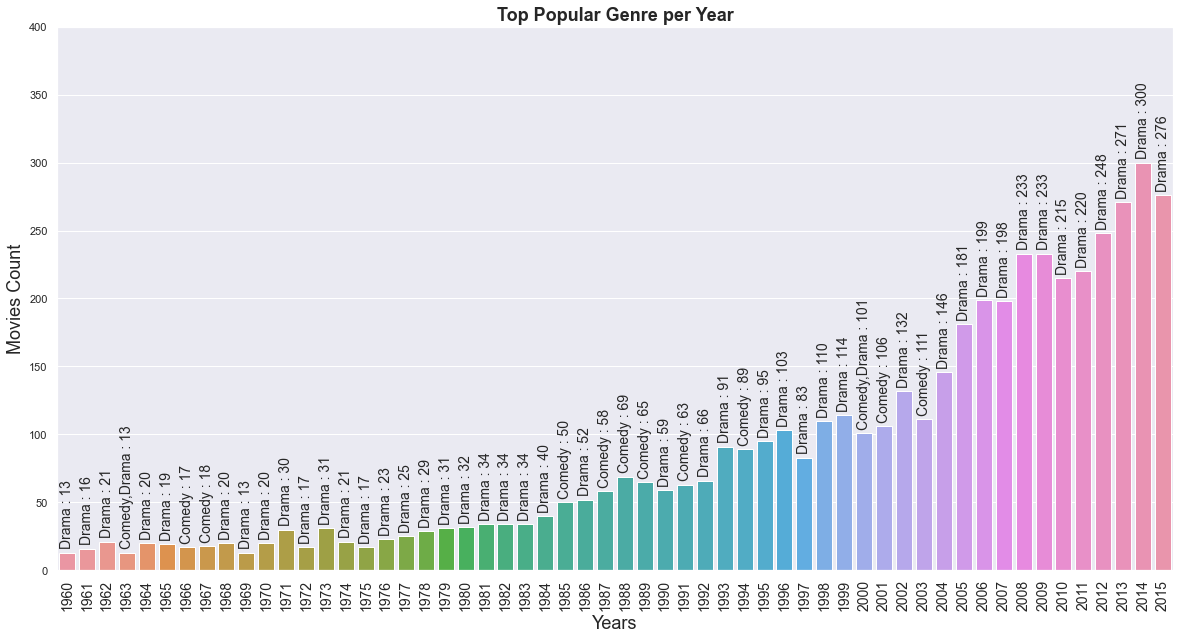

In [22]:
sns.set()
fig , ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x=df_tpg['release_year'], y=df_tpg['movie_count'])
ax.set_title('Top Popular Genre per Year', fontsize=18, weight='bold')
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Movies Count', fontsize=18)
ax.set_xticklabels(df_tpg['release_year'], rotation=90, fontsize=14)
labels = df_tpg['genres']+' : '+df_tpg['movie_count'].astype('string')
for rect, label in zip(ax.patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', rotation=90, fontsize=14)
#increase the graph top limit to allow writing the label related to the maximum count within the graph area.
ax.set_ylim(top=400)
plt.show()

<font color = blue>The above graph shows the following as a conclusion:
1. The top genre is mainly *Drama*.
2. *Comedy* became the top genre in 9 years; namely *1966, 1967,1985, 1987, 1988, 1989, 1994, 2001, 2003*.
3. There are 2 years; namely *1963, 2000* where both genres *Drama* and *Comedy* shared the first place.

The below cell computes the data required for Criteria 2 as follows  

1. Merge the original data **genres_df** and **df** over the common key ***imdb_id*** and get a relation between ***release_year***, ***genres***, ***imdb_id***.
2. Group the data by ***release_year*** and ***genres***, and get the count of the grouped ***imdb_id***. This gives us the number of movies produced in each genre in each year. We rename the ***imdb_id*** column containing the counts to ***movie_count*** to better match its current content.
3. Pivot our data so that we have a dataset indexed by ***release_year*** and then we have one column per genre, filled with number of movies for that genre at each particualr year if it is above the average number of movies per genre for that year, otherwise the entry will be *NaN* that will be replaced with *0* for plotting.
4. Once again, we compute the average number of movies for all genres per year and arrange it as another dataframe.
5. We subtract the two dataframes from each other, to get the error which represents the difference between the number of movies produced in that genre at that year and the average number of movies per genre per year. Once again, any negative value will be replaced with 0 because we are interested only in popular genres (more than the average).

In [23]:
#df_mpgs: mpg stands for "Most Popular Genres"

#Step 1
df_mpg=df_gp.copy()

#Step 2
df_mpg = df_mpg[df_mpg.groupby('release_year')['movie_count'].transform('mean') < df_mpg['movie_count']]

#Step 3
df_mpg = df_mpg.pivot(index='release_year', columns='genres', values='movie_count')
df_mpg.fillna(0,inplace=True)

#Step 4
df_mean = df_gp.copy()
df_mean = df_gp.groupby('release_year')['movie_count'].mean().to_frame()

#Step5
df_mpg = df_mpg.sub(df_mean['movie_count'], axis=0)
df_mpg[df_mpg<0] = 0

Plotting the explained dataset as a stacked barpolot showing the additional movies count above average per genre produced per year can tell us about each genre progress.

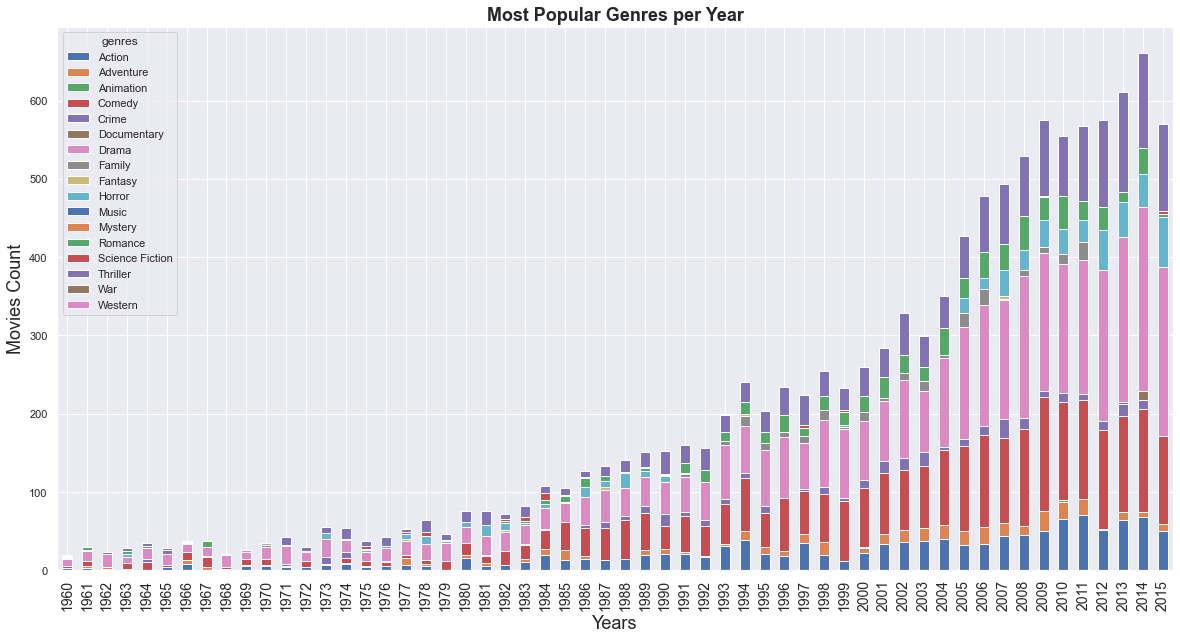

In [24]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))

ax = df_mpg.plot.bar(stacked=True, ax=ax)
ax.set_title('Most Popular Genres per Year', fontsize=18, weight='bold')
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Movies Count', fontsize=18)
ax.set_xticklabels(df_mpg.index, rotation=90, fontsize=14)
plt.show()

The above graph is not that clear, especially for the early years up until *1980*. The exponential nature of data limits concluding the early years. Perhaps the most appearing trends (at least since the *1980*'s) are:
1. ***Drama*** and ***Comedy*** genres, which is no new news. We know that thes are the most popular genres.
2. We can visually see a possibility of rising popularity for ***Thrillers***(since mid 90's), and ***Actions*** (since 2000's).

Anyways, we need another mean to look into this data. Basically, we need to unstack the stacked bar plot. This is what we will do below.

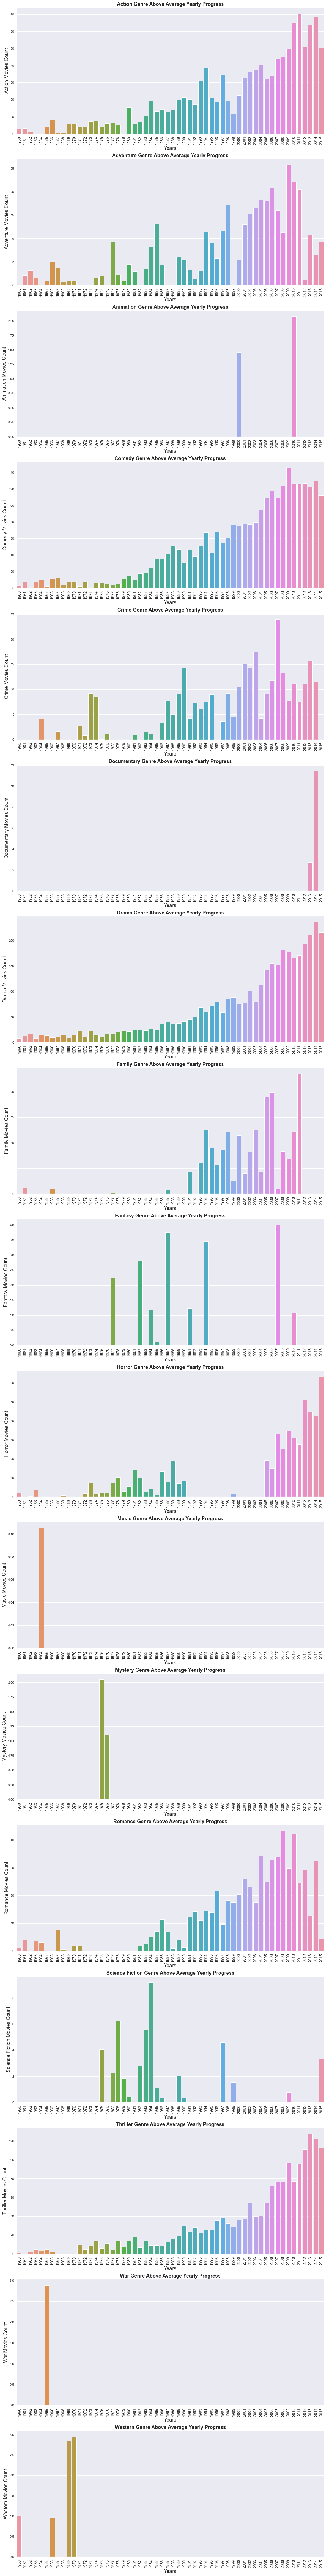

In [25]:
sns.set()
fig, axs = plt.subplots(nrows=df_mpg.shape[1], ncols=1 ,figsize=(20, 10*df_mpg.shape[1]))
for col,ax in zip(df_mpg,axs):
    sns.barplot(x=df_mpg.index, y=df_mpg[col], ax=ax)
    ax.set_xlabel('Years', fontsize=18)
    ax.set_ylabel(col+' Movies Count', fontsize=18)
    ax.set_xticklabels(df_mpg.index, rotation=90, fontsize=14)
    ax.set_title(col+' Genre Above Average Yearly Progress', fontsize=18, weight='bold')
plt.show()

Ok, that's a better plotting with more insight. We can conclude:
<font color=blue>
1. ***Comedy*** and ***Drama***: Each showing increasing popularity since *80*'s and *70*'s respectively, and reaching up to a maximum of around *140* and *240* movies above average respectively.
2. ***Thriller***: showing increasing popularity since early *70*'s with up to *120* movies above average.
3. ***Horror***: showing increasing popularity since *2005* with up to *80* movies above average.
4. ***Action***: showing fluctuating popularity since early *80*'s with up to *70* movies above average.
5. ***Romance***: showing increasing popularity since *90*'s with up to *40* movies above average.
6. ***Crime***: showing increasing popularity from mid *80*'s to mid *90*'s with up to *15* movies above average and since *2000* up to *25* movies.
7. ***Adventure***: showing increasing popularity since *90*'s with up to *15* movies above average and since *2000* up to *25* movies.

<a id='rq2'></a>
### Research Question 2: What properties are associated with high revenue movies?
#### Criteria:
1. We will examine all given attributes and understand their progress in relation to the defined high revenue movies. The attributes are of two main types: Numerical and Categorical.
2. Numerical attributes (such as release year, budget, vote count..etc) will be checked by scatter plots against the high revenue movies. Note that in absence of any mean of inferencial statistics, we will be only guessing based on visual appearance of the graph.
3. Categorical attributes (such as genres, directors,..etc) will be checked by tabulation of their counts above and below the given threshold of high revenue movies.
4. The question and all the above require defining what is a high revenue movie. You may want to consider something like Top10, but we will be more generic. We will assume that movies with revenues above a certain threshold will be considered as a high revenue movie. We will consider two thresholds; namely the mean and the 75% quartile. This definition is not relevant to numerical attributes, since generally correlation of numerical attributes should follow all the way being positive, negative..etc. However, this becomes of value when examining categorical attributes. As defined above, categorical attributes will be examined by splitting their counts to those above the threshold and those below. Changing the threshold substantially will change the counts going into each bin.

In [26]:
print('The dataset has {} records'.format(df.shape[0]))
print('There are {} records with zero revenues'.format(df[df['revenue']==0].shape[0]))
print('There are {} records with zero adjusted revenues'.format(df[df['revenue_adj']==0].shape[0]))
if df[df['revenue']==0].equals(df[df['revenue_adj']==0]):
    print('and they are the same records')
else:
    print('but they are diffent records')
print('This means that {}% of the dataframe is irrelevant to the question. Any conclusion is highly questionable.'
      .format(100*df[df['revenue_adj']==0].shape[0]/df.shape[0]))

The dataset has 10855 records
There are 6006 records with zero revenues
There are 6006 records with zero adjusted revenues
and they are the same records
This means that 55.32934131736527% of the dataframe is irrelevant to the question. Any conclusion is highly questionable.


**<font color=red>More than half of the data (55%) has zero revenues. Analysis and conclusions based on the remaining data is highly questionable.</font>**<br><br>
Preparing the data here is simple as follows:
1. Drop the rows with *0* ***revenue_adj***.
2. For movies that make revenues up to billions of dollars need not have their revenues compared to the cent. As such, we will remove the decimal part of the revenue to ease its plotting. The maximum revenue though is bigger than the maximum integer range, as such the easy conversion of float-int-float to reset decimals won't work. However, the revenues fall well within the int64 data type and as such we will follow the same conversion method but it will be float-int64-int.

In [27]:
df_revenue = df.drop(df[df['revenue_adj']==0].index)
df_revenue['revenue_adj'] = df_revenue['revenue_adj'].astype('int64')
df_revenue['revenue_adj'] = df_revenue['revenue_adj'].astype('float')
print('maximum revenue in dataset: {}'.format(df_revenue['revenue_adj'].max()))
df_revenue['budget_adj'] = df_revenue['budget_adj'].astype('int64')
df_revenue['budget_adj'] = df_revenue['budget_adj'].astype('float')
df_revenue.sort_values('revenue_adj', ascending=False, inplace=True)
df_revenue.reset_index(inplace=True)
print('The used dataset contains {} rows'.format(df_revenue.shape[0]))
print('The used dataset columns: {}'.format(df_revenue.columns.values))

maximum revenue in dataset: 2827123750.0
The used dataset contains 4849 rows
The used dataset columns: ['imdb_id' 'popularity' 'budget' 'revenue' 'original_title' 'runtime'
 'vote_count' 'vote_average' 'release_year' 'budget_adj' 'revenue_adj']


Plotting the explained dataset as a scatter plot can visually tell us of possibilities of relations.

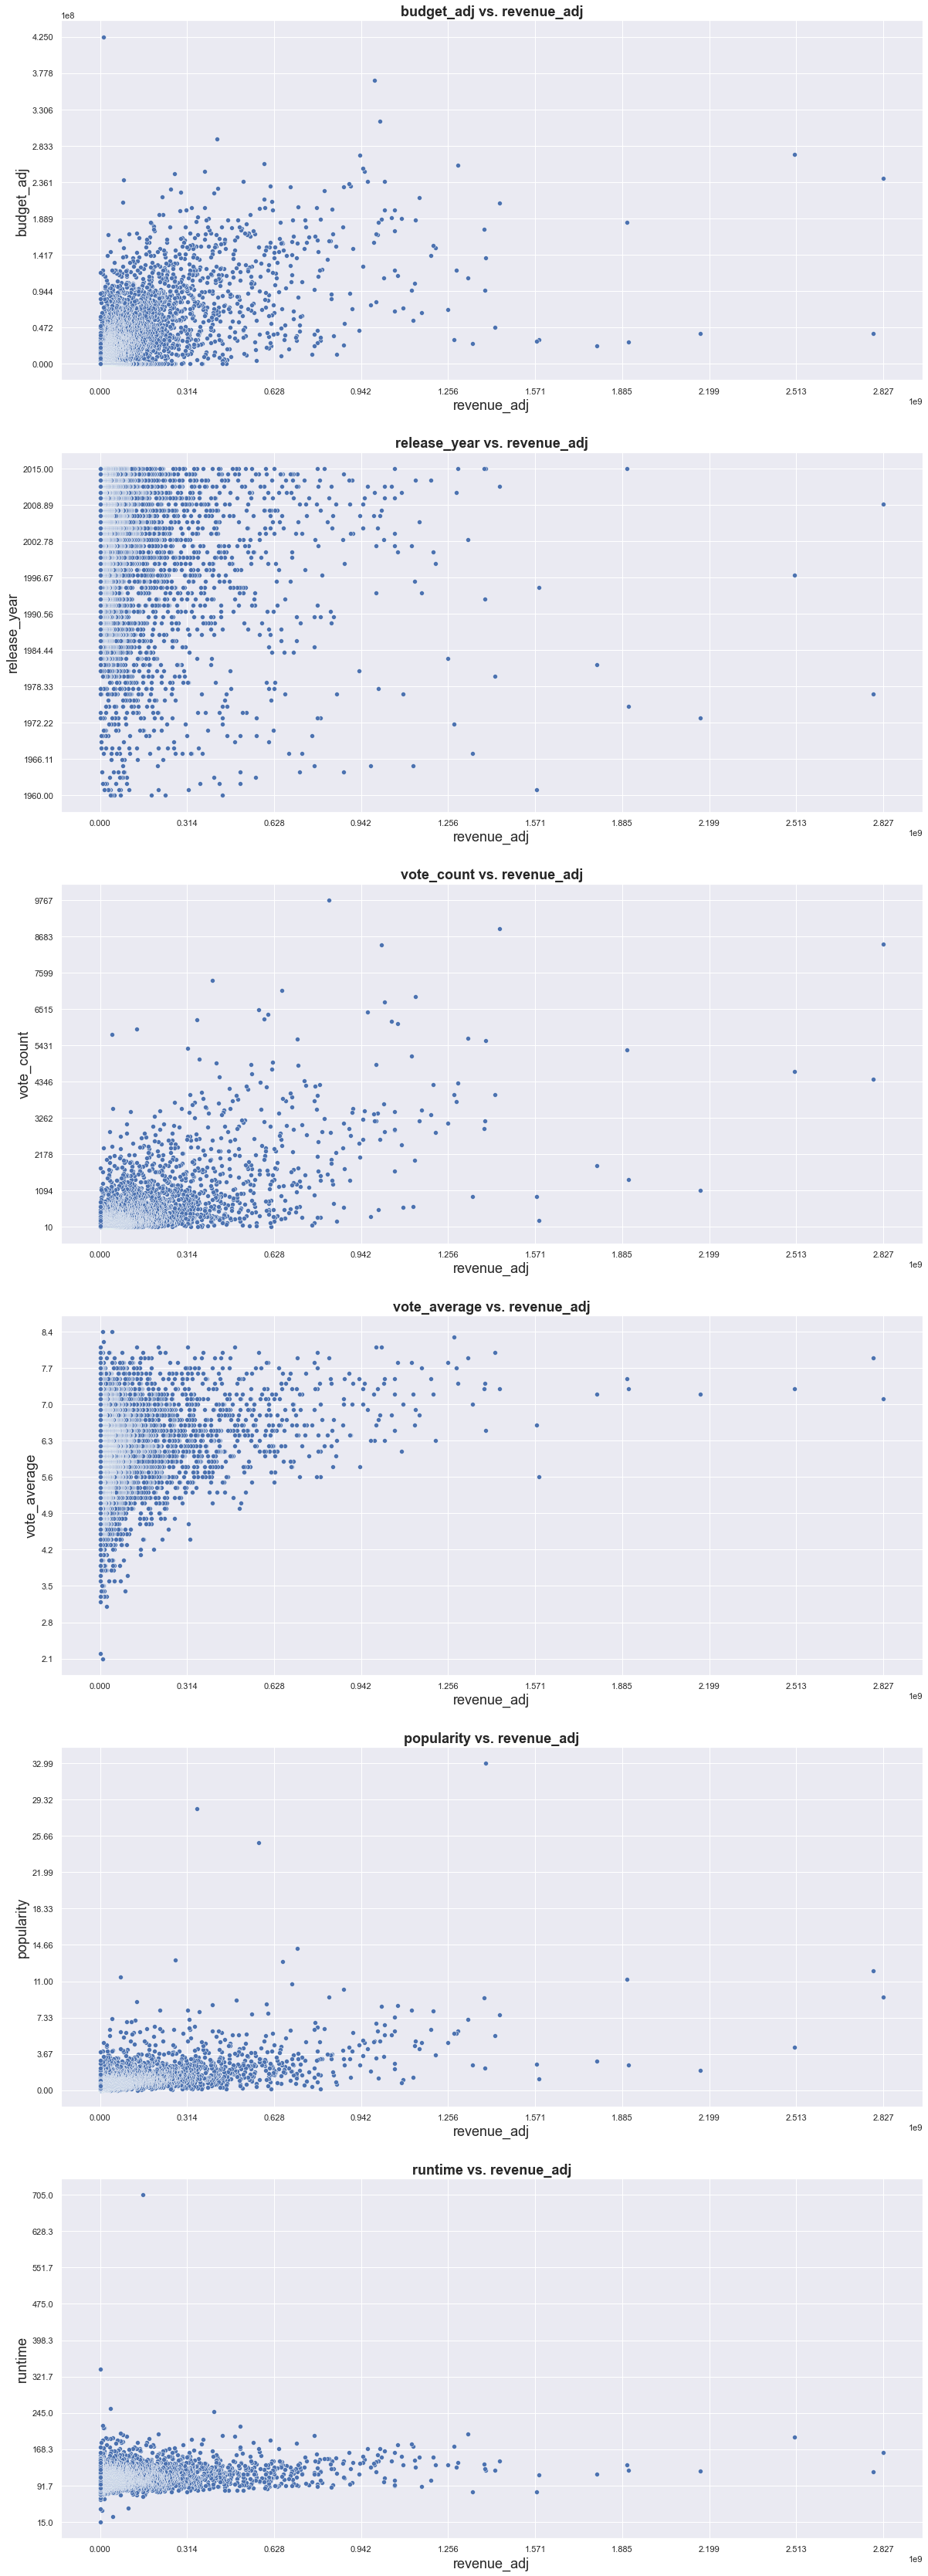

In [28]:
cols=['budget_adj','release_year','vote_count','vote_average','popularity','runtime']
sns.set()
fig, axs = plt.subplots(len(cols),1, figsize=(20, 10*len(cols)))

for col,ax in zip(cols,axs):
    x_tick_value = np.linspace(df_revenue['revenue_adj'].min(), df_revenue['revenue_adj'].max(),num=10).tolist()
    y_tick_value = np.linspace(df_revenue[col].min(), df_revenue[col].max(),num=10).tolist()
    sns.scatterplot(x=df_revenue['revenue_adj'], y=df_revenue[col], ax=ax)
    ax.set_title('{} vs. revenue_adj'.format(col), fontsize=18, weight='bold')
    ax.set_xlabel('revenue_adj', fontsize=18)
    ax.set_ylabel('{}'.format(col), fontsize=18)
    ax.set_xticks(x_tick_value)
    ax.set_yticks(y_tick_value)
plt.show()

Ok. What do these graphs tell us?<br>
Well, without inferential statistics, nothing much. But we will try to conclude them nonetheless:
<font color=blue>
1. There seems to be a positive correlation between ***budjet_adj*** and ***revenue_adj***.
2. There seems to be a positive correlation between ***vote_count*** and ***revenue_adj***.
3. There seems to be a positive correlation between ***popularity*** and ***revenue_adj***.

Now it is time to prepare the data to evaluate the categorical data.<br>
For each categorical attribute (***cast***, ***director***, ***keywords***, ***genres*** and ***production_companies***) we proceed as follows:
1. Merge the attribute's original dataset (a copy of it) with the dataset containing valid revenues and generating a dataset with only the ***attribute name*** and ***revenue_adj***.
2. Group by ***attribute name*** and creating two new columns ***over*** and ***under***, each containing the number of times each attribute value has occured at a movie above and below the high revenue threshold. Then we drop those rows that have their ***over*** attribute equals *0, since they will not be beneficial to our analysis.
3. Calculate a difference between the ***over*** and ***under*** and add it as a ***diff*** to our dataset, and sort the dataset by *descending* ***diff*** values.
4. We compute all the above for each attribute (located in a different dataset).
5. We call all the above computations for two thresholds, as defined in the criteria section; namely at the mean and the 75% quantile.

In [29]:
def evaluate(df_org, attr_name, describe_index):
    high_rev_threshold = df_revenue['revenue_adj'].describe()[describe_index]
    
    #Step 1
    df_copy = df_org.copy()
    df_copy =df_copy.merge(df_revenue, on = 'imdb_id')
    
    #Step 2
    df_copy.drop(df_copy.columns.difference([attr_name,'revenue_adj']), axis=1, inplace=True)
    x = df_copy.groupby(attr_name).agg(
        over=pd.NamedAgg(column='revenue_adj', aggfunc= lambda x: (x>=high_rev_threshold).sum()),
        under=pd.NamedAgg(column='revenue_adj', aggfunc= lambda x: (x<high_rev_threshold).sum())).reset_index()
    x.drop(x[x['over']==0].index, inplace=True)
    
    #Step 3
    x['diff']=x['over']-x['under']
    x.sort_values('diff', ascending=False, inplace=True)
    return x

#Step 4
def get_all(describe_index):
    cast_df_revenue = evaluate(cast_df,'cast',describe_index)
    director_df_revenue = evaluate(director_df,'director',describe_index)
    keywords_df_revenue = evaluate(keywords_df,'keywords',describe_index)
    genres_df_revenue = evaluate(genres_df,'genres',describe_index)
    production_companies_df_revenue = evaluate(production_companies_df,'production_companies',describe_index)
    result = [cast_df_revenue, director_df_revenue, keywords_df_revenue, genres_df_revenue, production_companies_df_revenue]
    return result

#Step 5
all_cat_1 = get_all(1) #parameter passed (1) is the zero based index no. 1 in the describe() function (which is mean)
all_cat_6 = get_all(6) #parameter passed (6) is the zero based index no. 6 in the describe() function (which is 75%)

We visualize the results of the data through displaying tabular format of each dataframe's top10 and bottom10 rows. We use ***display()*** to print a number of dataframes in a single cell using **<u>Jupyter Notebook</u>** standard formatting. We do this visualization twice, one for each threshold specified.

In [30]:
n_rows = 10
for x in all_cat_1:
    display(x.iloc[[*range(n_rows), *range(-1 * n_rows, 0)]])

,cast,over,under,diff
8146,Tom Cruise,27.0,7.0,20.0
8482,Will Smith,17.0,3.0,14.0
8153,Tom Hanks,25.0,12.0,13.0
1010,Brad Pitt,24.0,12.0,12.0
1193,Cameron Diaz,20.0,10.0,10.0
3412,Jack Nicholson,14.0,5.0,9.0
624,Arnold Schwarzenegger,19.0,10.0,9.0
3922,Jim Carrey,18.0,10.0,8.0
7107,Roger Moore,8.0,1.0,7.0
995,Bonnie Hunt,8.0,1.0,7.0


,director,over,under,diff
2076,Steven Spielberg,24.0,4.0,20.0
1861,Robert Zemeckis,13.0,2.0,11.0
1469,Michael Bay,10.0,1.0,9.0
475,David Fincher,9.0,1.0,8.0
2137,Tim Burton,12.0,5.0,7.0
1879,Roland Emmerich,8.0,1.0,7.0
1884,Ron Howard,12.0,6.0,6.0
298,Carlos Saldanha,6.0,0.0,6.0
365,Christopher Nolan,7.0,1.0,6.0
1138,Jon Turteltaub,7.0,1.0,6.0


,keywords,over,under,diff
4838,saving the world,31.0,4.0,27.0
19,3d,22.0,3.0,19.0
3436,marvel comic,24.0,6.0,18.0
181,animation,17.0,5.0,12.0
5292,spy,24.0,13.0,11.0
861,car race,14.0,4.0,10.0
4903,secret identity,19.0,9.0,10.0
434,based on comic book,14.0,6.0,8.0
898,cataclysm,9.0,1.0,8.0
2602,hero,19.0,11.0,8.0


,genres,over,under,diff
2,Animation,131.0,107.0,24.0
1,Adventure,422.0,419.0,3.0
18,Sci-Fi,1.0,12.0,-11.0
25,Western,22.0,43.0,-21.0
24,War,56.0,84.0,-28.0
8,Family,238.0,269.0,-31.0
9,Fantasy,210.0,260.0,-50.0
11,History,45.0,119.0,-74.0
13,Music,48.0,142.0,-94.0
6,Documentary,1.0,101.0,-100.0


,production_companies,over,under,diff
3855,Twentieth Century Fox Film Corporation,126.0,95.0,31.0
173,Amblin Entertainment,43.0,16.0,27.0
1101,DreamWorks Animation,26.0,3.0,23.0
4020,Walt Disney Pictures,77.0,55.0,22.0
1206,Eon Productions,22.0,0.0,22.0
1103,DreamWorks SKG,47.0,27.0,20.0
2900,Pixar Animation Studios,16.0,0.0,16.0
1946,Jerry Bruckheimer Films,19.0,4.0,15.0
2134,Legendary Pictures,25.0,13.0,12.0
5,1492 Pictures,13.0,3.0,10.0


<font color=blue>
This tabulation gives an indication of the categorical values associations with high revenue movies.In this tabulation, a high revenue movie is a movie with revenue above the average revenue in the dataset.<br>
We take only the most and least values. Given the limitation of using only descriptive statistics, combined with dropping half of the dataset due to lack of revenue data makes it a guess rather than a conclusion to go beyond those values.

| Attribute | Attribute Value most associated to high revenue | Attribute Value least associated to High Revenue |
| :-: | :-: | :-: |
| Cast | Tom Cruise | Ethan Hawke |
| Director | Stephen Spilberg | Woody Allen |
| Keywords | Saving The World | Sex |
| Genres | Animation | Drama and Comedy (see note below) |
| Production Companies | Twentieth Century Fox Film Corporation | New Line Cinema |

note: Drama and Comedy are the least likely genres resulting in high revenue movie, although they were the most popular genres when examining research question 1. While there might be contextual explanations to this observation, but we must also take into consideration that we dropped half of the dataset when we were doing revenue analysis. We didn't examine the effect of this dropping on research question 1.

In [31]:
n_rows = 10
for x in all_cat_6:
    display(x.iloc[[*range(n_rows), *range(-1 * n_rows, 0)]])

,cast,over,under,diff
8146,Tom Cruise,27.0,7.0,20.0
8482,Will Smith,17.0,3.0,14.0
1010,Brad Pitt,23.0,13.0,10.0
3922,Jim Carrey,18.0,10.0,8.0
61,Adam Sandler,18.0,11.0,7.0
7107,Roger Moore,8.0,1.0,7.0
7259,Sacha Baron Cohen,7.0,0.0,7.0
995,Bonnie Hunt,8.0,1.0,7.0
5693,Mel Gibson,17.0,11.0,6.0
2346,Eddie Murphy,20.0,14.0,6.0


,director,over,under,diff
2076,Steven Spielberg,23.0,5.0,18.0
1861,Robert Zemeckis,13.0,2.0,11.0
1469,Michael Bay,10.0,1.0,9.0
475,David Fincher,9.0,1.0,8.0
1879,Roland Emmerich,8.0,1.0,7.0
1883,Ron Clements,6.0,0.0,6.0
1096,John Musker,6.0,0.0,6.0
889,James Cameron,7.0,1.0,6.0
298,Carlos Saldanha,6.0,0.0,6.0
2181,Tom Shadyac,6.0,1.0,5.0


,keywords,over,under,diff
4838,saving the world,30.0,5.0,25.0
3436,marvel comic,24.0,6.0,18.0
19,3d,19.0,6.0,13.0
181,animation,16.0,6.0,10.0
4903,secret identity,19.0,9.0,10.0
861,car race,14.0,4.0,10.0
5292,spy,23.0,14.0,9.0
4683,riddle,14.0,6.0,8.0
2602,hero,19.0,11.0,8.0
5911,tyrannosaurus rex,7.0,0.0,7.0


,genres,over,under,diff
2,Animation,126.0,112.0,14.0
18,Sci-Fi,1.0,12.0,-11.0
25,Western,19.0,46.0,-27.0
24,War,54.0,86.0,-32.0
1,Adventure,403.0,438.0,-35.0
8,Family,222.0,285.0,-63.0
9,Fantasy,194.0,276.0,-82.0
11,History,39.0,125.0,-86.0
6,Documentary,1.0,101.0,-100.0
13,Music,42.0,148.0,-106.0


,production_companies,over,under,diff
1101,DreamWorks Animation,26.0,3.0,23.0
1206,Eon Productions,22.0,0.0,22.0
173,Amblin Entertainment,40.0,19.0,21.0
3855,Twentieth Century Fox Film Corporation,119.0,102.0,17.0
2900,Pixar Animation Studios,16.0,0.0,16.0
1946,Jerry Bruckheimer Films,19.0,4.0,15.0
2134,Legendary Pictures,25.0,13.0,12.0
4020,Walt Disney Pictures,72.0,60.0,12.0
492,Blue Sky Studios,10.0,0.0,10.0
1701,Heyday Films,12.0,2.0,10.0


<font color=blue>
This tabulation gives an indication of the categorical values associations with high revenue movies. In this tabulation, a high revenue movie is a movie with revenue above the 75% point revenue in the dataset.<br>
We take only the most and least values. Given the limitation of using only descriptive statistics, combined with dropping half of the dataset due to lack of revenue data makes it a guess rather than a conclusion to go beyond those values.

| Attribute | Attribute Value most associated to high revenue | Attribute Value least associated to High Revenue |
| :-: | :-: | :-: |
| Cast | Tom Cruise | Ethan Hawke |
| Director | Stephen Spilberg | Woody Allen |
| Keywords | Saving The World | Sex |
| Genres | Animation | Drama and Comedy (see note 1 below) |
| Production Companies | DreamWorks Animation (see note 2 below)| New Line Cinema |

note 1: Drama and Comedy are the least likely genres resulting in high revenue movie, although they were the most popular genres when examining research question 1. While there might be contextual explanations to this observation, but we must also take into consideration that we dropped half of the dataset when we were doing revenue analysis. We didn't examine the effect of this dropping on research question 1.<br><br>
note 2: Categorical value changed between the mean and 75% thresholds. Also for all categorical attributes, while results stayed the same, the ***over*** and ***under*** values have changed.

<a id='conclusions'></a>
## Conclusions

#### Limitations and Constraints
1. This entire project is strictly based on descriptive statistics.
2. No statistical tests were performed. All conclusions are visual observations of data. Causation from correlation cannot be assumed or implied.
3. Conclusions of research question 2 are highly questionable since more than 50% of the original dataset have no information regarding the property under investigation (revenue).
4. As a consequence of item 3, the genres that appeared to be the top genres in question 1 appeared as the genres least associated with high revenue in question 2.

#### Research Question 1  

1. The top genre is mainly *Drama*.
2. *Comedy* became the top genre in 9 years; namely *1966, 1967,1985, 1987, 1988, 1989, 1994, 2001, 2003*.
3. There are 2 years; namely *1963, 2000* where both genres *Drama* and *Comedy* shared the first place.
4. ***Comedy*** and ***Drama***: Each showing increasing popularity since *80*'s and *70*'s respectively, and reaching up to a maximum of around *140* and *240* movies above average respectively.
5. ***Thriller***: showing increasing popularity since early *70*'s with up to *120* movies above average.
6. ***Horror***: showing increasing popularity since *2005* with up to *80* movies above average.
7. ***Action***: showing fluctuating popularity since early *80*'s with up to *70* movies above average.
8. ***Romance***: showing increasing popularity since *90*'s with up to *40* movies above average.
9. ***Crime***: showing increasing popularity from mid *80*'s to mid *90*'s with up to *15* movies above average and since *2000* up to *25* movies.
10. ***Adventure***: showing increasing popularity since *90*'s with up to *15* movies above average and since *2000* up to *25* movies.<br>

#### Research Question 2  

1. There seems to be a positive correlation between ***budjet_adj*** and ***revenue_adj***.
2. There seems to be a positive correlation between ***vote_count*** and ***revenue_adj***.
3. There seems to be a positive correlation between ***popularity*** and ***revenue_adj***.
4. Tabulating the categorical value that is most likely to result in a high revenue movie (the biggest difference) and the categorical value that is least likely to result in a high revenue movie (the smallest difference) at a threshold of the average revenue reveals the following table:

| Attribute | Attribute Value most associated to high revenue | Attribute Value least associated to High Revenue |
| :-: | :-: | :-: |
| Cast | Tom Cruise | Ethan Hawke |
| Director | Stephen Spilberg | Woody Allen |
| Keywords | Saving The World | Sex |
| Genres | Animation | Drama and Comedy (see note 1 below) |
| Production Companies | Twentieth Century Fox Film Corporation | New Line Cinema |

5. Tabulating the categorical value that is most likely to result in a high revenue movie (the biggest difference) and the categorical value that is least likely to result in a high revenue movie (the smallest difference) at a threshold of the average revenue reveals the following table:

| Attribute | Attribute Value most associated to high revenue | Attribute Value least associated to High Revenue |
| :-: | :-: | :-: |
| Cast | Tom Cruise | Ethan Hawke |
| Director | Stephen Spilberg | Woody Allen |
| Keywords | Saving The World | Sex |
| Genres | Animation | Drama and Comedy (see note 1 below) |
| Production Companies | DreamWorks Animation (see note 2 below)| New Line Cinema |

note 1: Drama and Comedy are the least likely genres resulting in high revenue movie, although they were the most popular genres when examining research question 1. While there might be contextual explanations to this observation, but we must also take into consideration that we dropped half of the dataset when we were doing revenue analysis. We didn't examine the effect of this dropping on research question 1.<br><br>
note 2: Categorical value changed between the mean and 75% thresholds. Also for all categorical attributes, while results stayed the same, the ***over*** and ***under*** values have changed.